<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Quiz](04.03-Quiz.ipynb) | [Contents](00.00-Index.ipynb) | [Evolutions: ggplot2, Plotly and Shiny](05.02-ggplot2.ipynb) ></span>

<a href="https://colab.research.google.com/github/eurostat/e-learning/blob/main/r-official-statistics/05.01-Basic-Plotting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


<a id='top'></a>

# Basic Plotting
## Content  
- [Simple Line Plots](#simple-line)
- [Adjusting the Plot](#adjust)
- [Saving Figures to File](#save)
- [Simple Scatter Plots](#scatter)
- [Histograms and Density](#histo)
- [Multiple Subplots](#multiple)  
  <br><br>  
  
Data visualizations are one of the most powerful tools for exploring data and communicating data insights, particularly when dealing with numeric values. R has a simple, yet powerful set of built in graphics functions that let you create plots with minimal code. The plots produced by R's base graphics functions might not be very nice-looking, but they are useful for quick and dirty exploratory analysis.

<a id='simple-line'></a>

## Simple Line Plots
Without any other arguments, R plots the data with circles and uses the variable names for the axis labels. 


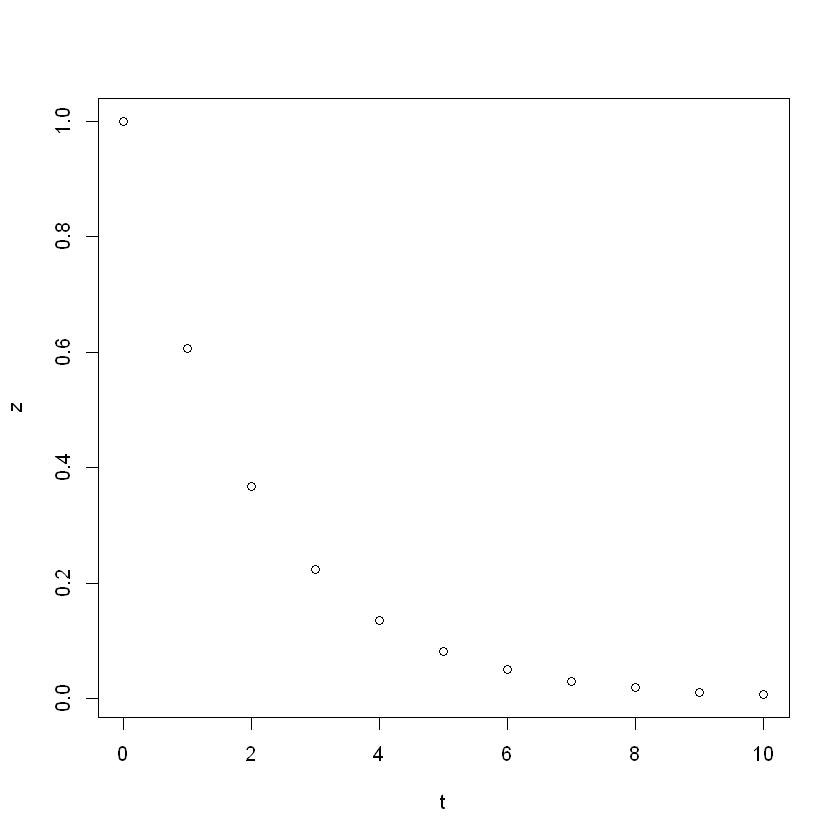

In [2]:
t <- 0:10
z <- exp(-t/2)

# The simplest R command to plot z versus t is this
plot(t,z)

<a id='adjust'></a>

## Adjusting the Plot
 The plot command accepts many arguments to change the look of the graph. Here, we use type="l" to plot a line rather than symbols, change the color to green, make the line width be 5, specify different labels for the x and y axis, and add a title (with the main argument).


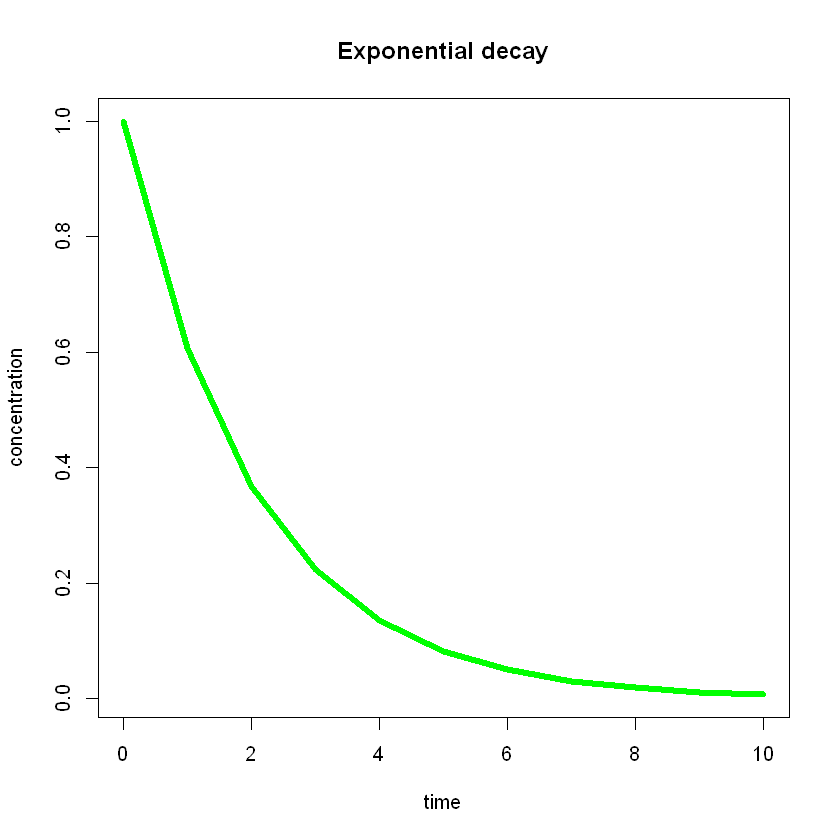

In [3]:
plot(t, z, type="l", col="green", lwd=5, 
     xlab="time", ylab="concentration", main="Exponential decay")

### A line plot with multiple series
Imagine that you wanted to plot not only z but also a variable w that was increasing with time.  


In [4]:
w = 0.1*exp(t/3)

One way to plot separate lines for both z and w is to first plot z with the plot and then add a line for w with the lines command.

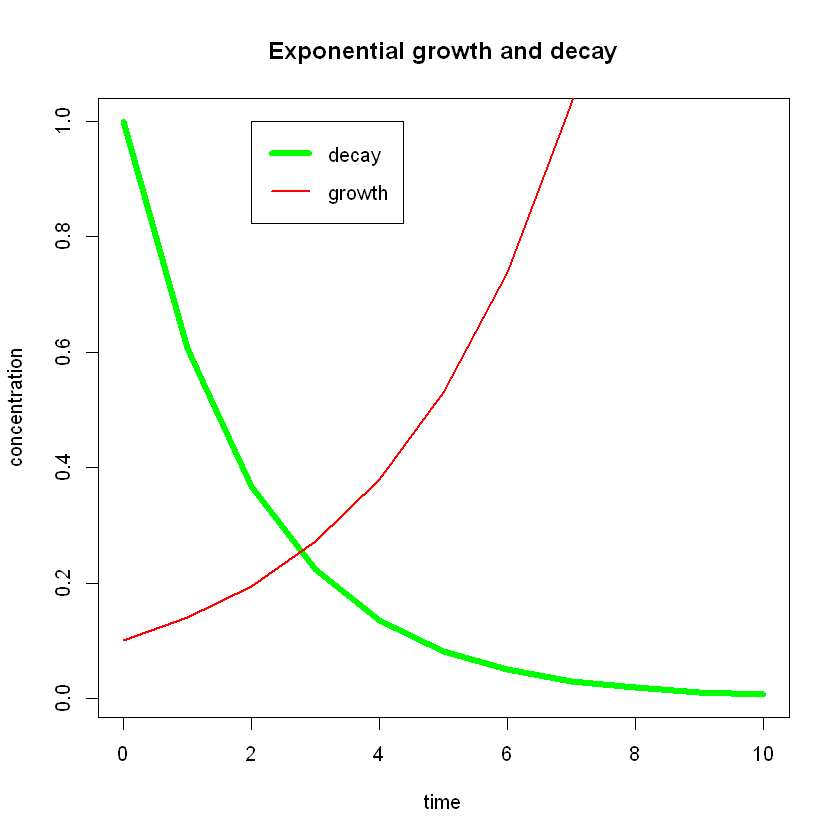

In [5]:
plot(t, z, type="l", col="green", lwd=5, xlab="time", ylab="concentration")
lines(t, w, col="red", lwd=2)
title("Exponential growth and decay")
legend(2,1,c("decay","growth"), lwd=c(5,2), col=c("green","red"), y.intersp=1.5)

Notice that the range of the plot does not expand to include all of the line plotted by the lines command. Adding the argument ylim = range(w,z) will ensure that the y-axis limits include all the data from both z and w. And a little bit more aesthetics:

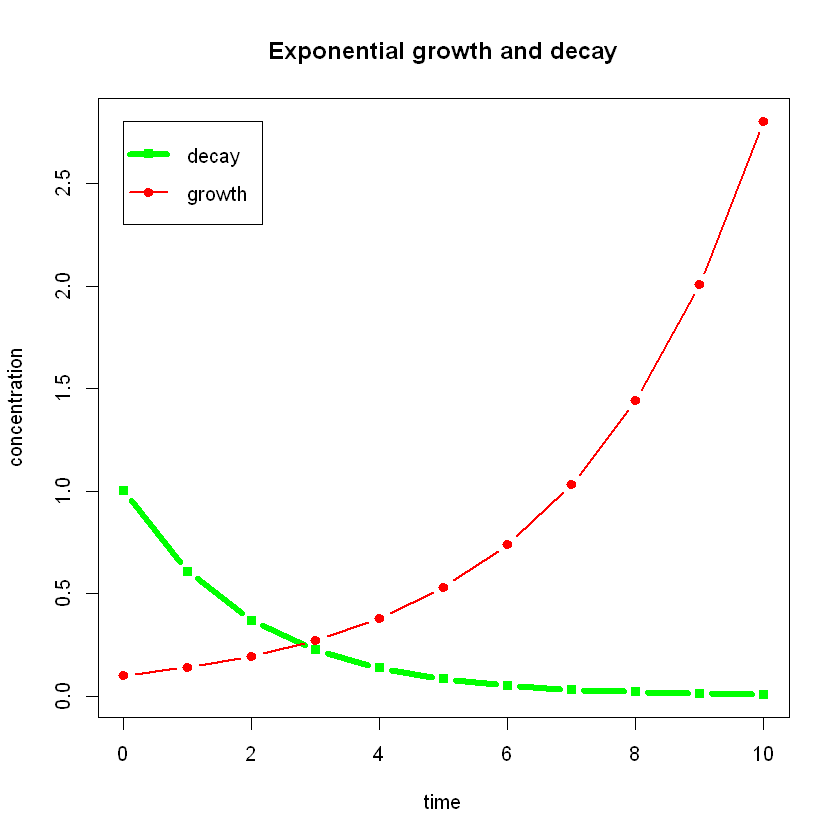

In [6]:
plot(t,z, type="b", col="green", lwd=5, pch=15, xlab="time", ylab="concentration", ylim=range(w,z))
lines(t, w, type="b", col="red", lwd=2, pch=19)
title("Exponential growth and decay")
legend(0,2.8,c("decay","growth"), lwd=c(5,2), col=c("green","red"), pch=c(15,19), y.intersp=1.5)

<a id='save'></a>

## Saving Figures to File
To save a base plot, you must follow these 3 easy steps:
- Specify files to save your image using a function such as jpeg(), png(), svg() or pdf().  
Additional argument indicating the width and the height of the image can be also used.
- Create the plot
- Close the file with dev.off()

In [16]:
# 1. save a file (next line creates an empty file)
jpeg('img/plot_test.jpg')
# 2. use the same stuff as in the previous plot
plot(t,z, type="b", col="green", lwd=5, pch=15, xlab="time", ylab="concentration", ylim=range(w,z))
lines(t, w, type="b", col="red", lwd=2, pch=19)
title("Exponential growth and decay")
legend(0,2.8,c("decay","growth"), lwd=c(5,2), col=c("green","red"), pch=c(15,19), y.intersp=1.5)
# 3. close the file
dev.off()

png 
  2

And here is the saved jpeg (img/plot_test.jpg):  
  <br>  
   
![plot_test.jpg](img/plot_test.jpg)

<a id='scatter'></a>

## Scatter Plots
The base is realy basic here. The same plot function can be used but with not to much customization:


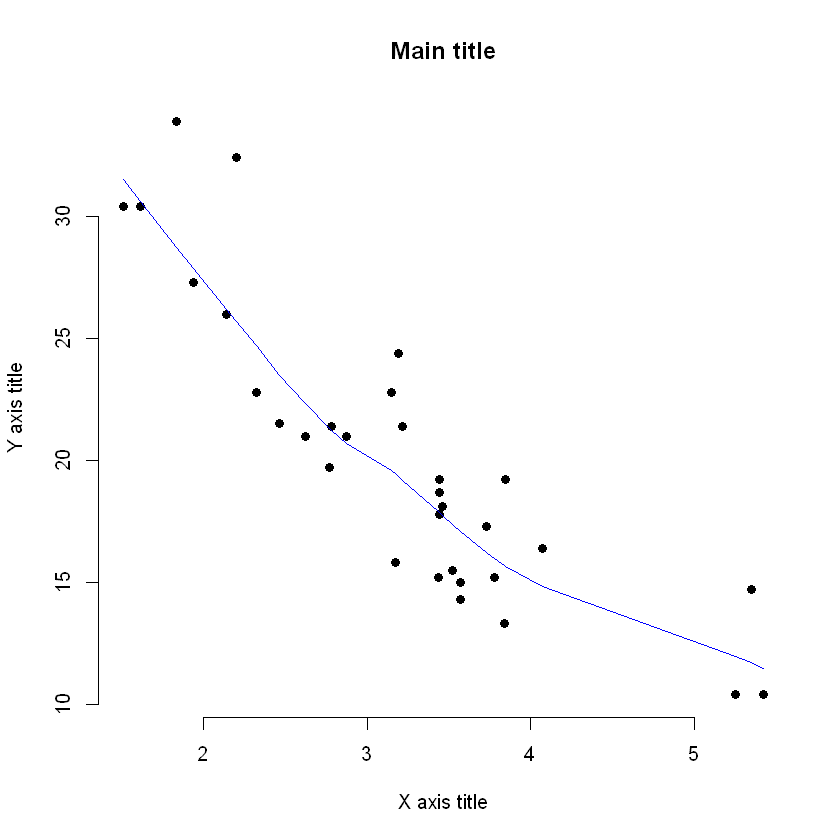

In [8]:
x <- mtcars$wt
y <- mtcars$mpg
# Plot with main and axis titles
# Change point shape (pch = 19) and remove frame.
plot(x, y, main = "Main title",
     xlab = "X axis title", ylab = "Y axis title",
     pch = 19, frame = FALSE)
# Add loess fit
# abline(lm(y ~ x, data = mtcars), col = "blue")
lines(lowess(x, y), col = "blue")

### Enhanced scatter plots
In the next chapter we will details a more aesthetically pleasing library for all types of plots: ggplot2, but for now, we want to provide some alternatives:
#### car::scatterplot()
The function scatterplot() in car package makes enhanced scatter plots, with box plots in the margins, a non-parametric regression smooth, smoothed conditional spread, outlier identification, and a regression line, etc.
#### 3D scatter plots
To plot a 3D scatterplot the function scatterplot3D in scatterplot3D package can be used.

<a id='histo'></a>

## Histograms and Density
A histogram can be created using the function hist(), which simplified format is as follow:

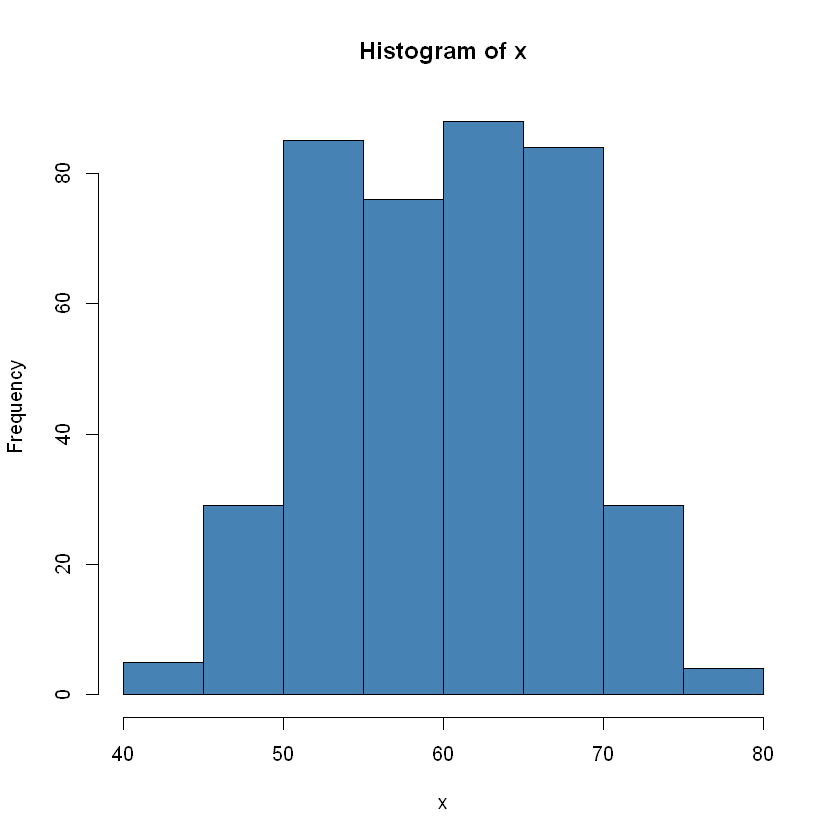

In [9]:
# create some random data
set.seed(1234)
x <- c(rnorm(200, mean=55, sd=5), rnorm(200, mean=65, sd=5))

# plot a histogram with steelblue color
hist(x, col = "steelblue")

Changing the number of breaks:

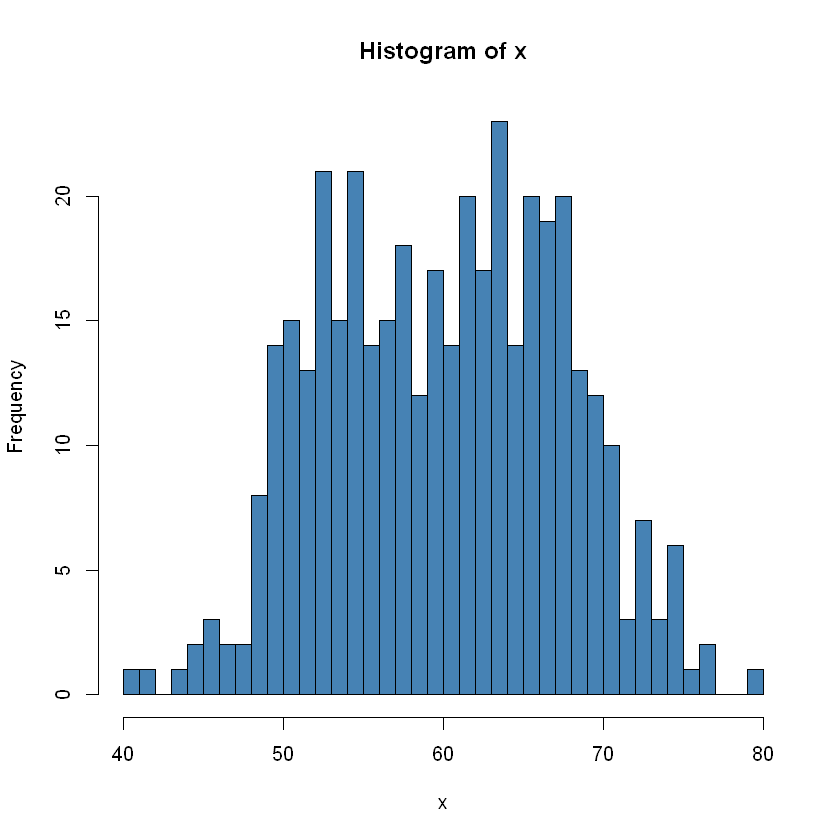

In [10]:
hist(x, col = "steelblue", breaks = 30)

### Create density plots: density()
The function density() is used to estimate kernel density.

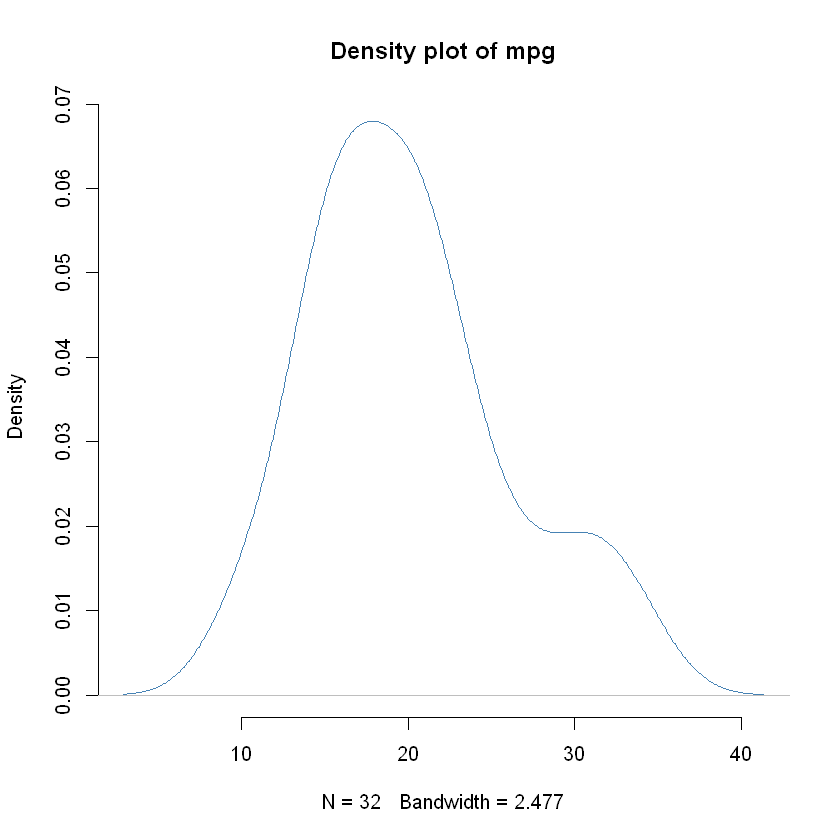

In [11]:
# Compute the density data
dens <- density(mtcars$mpg)
# plot density
plot(dens, frame = FALSE, col = "steelblue", main = "Density plot of mpg")

Fill the density plot using polygon():

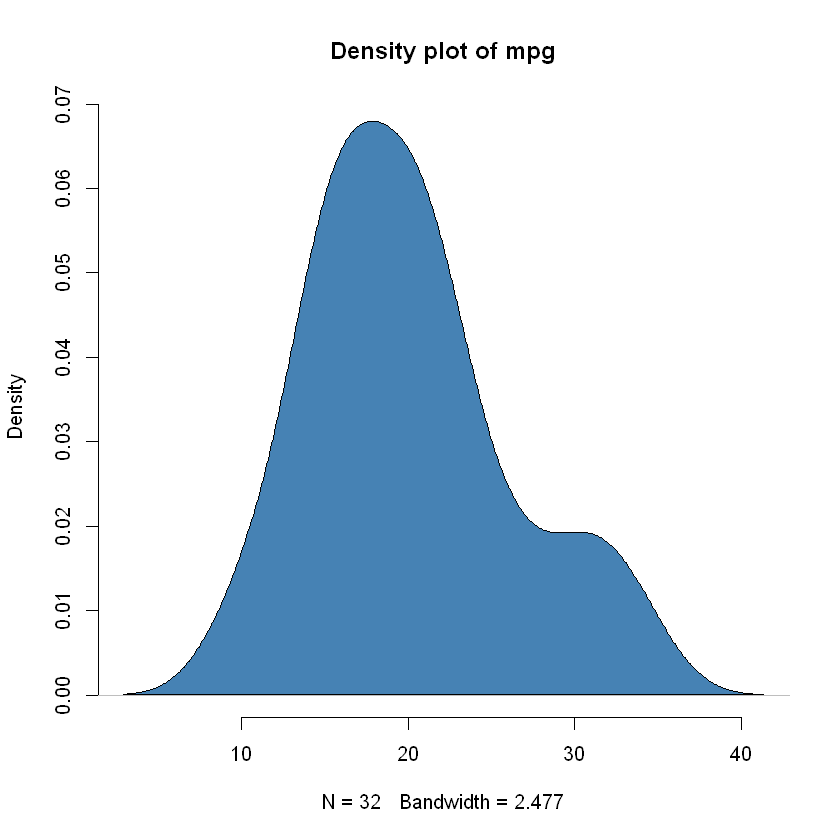

In [12]:
plot(dens, frame = FALSE, col = "steelblue", main = "Density plot of mpg") 
polygon(dens, col = "steelblue")

<a id='multiple'></a>

## Multiple Subplots
We can put multiple graphs in a single plot by setting some graphical parameters with the help of par() function. R programming has a lot of graphical parameters which control the way our graphs are displayed.  
Graphical parameter mfrow can be used to specify the number of subplot we need. 
It takes in a vector of form c(m, n) which divides the given plot into m*n array of subplots.

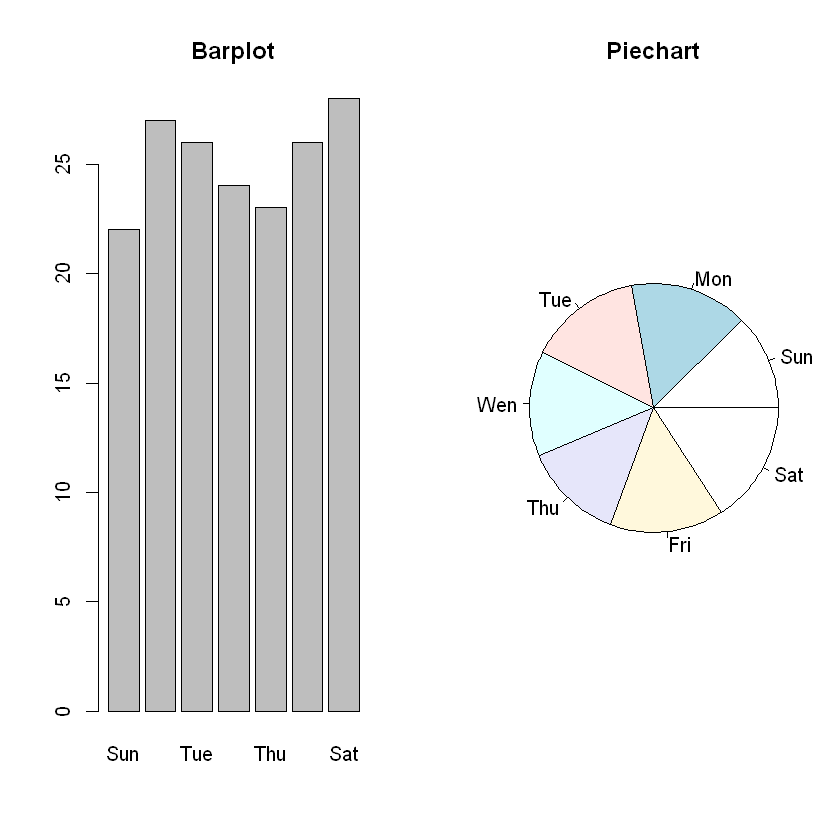

In [2]:
# a vector used for plotting
max.temp <- c('Sun'=22, 'Mon'=27, 'Tue'=26, 'Wen'=24, 'Thu'=23, 'Fri'=26, 'Sat'=28)
# set the plotting area into a 1*2 array
par(mfrow=c(1,2))
barplot(max.temp, main="Barplot")
pie(max.temp, main="Piechart", radius=1)

This same phenomenon can be achieved with the graphical parameter mfcol.  
The only difference between the two is that, mfrow fills in the subplot region row wise while mfcol fills it column wise.

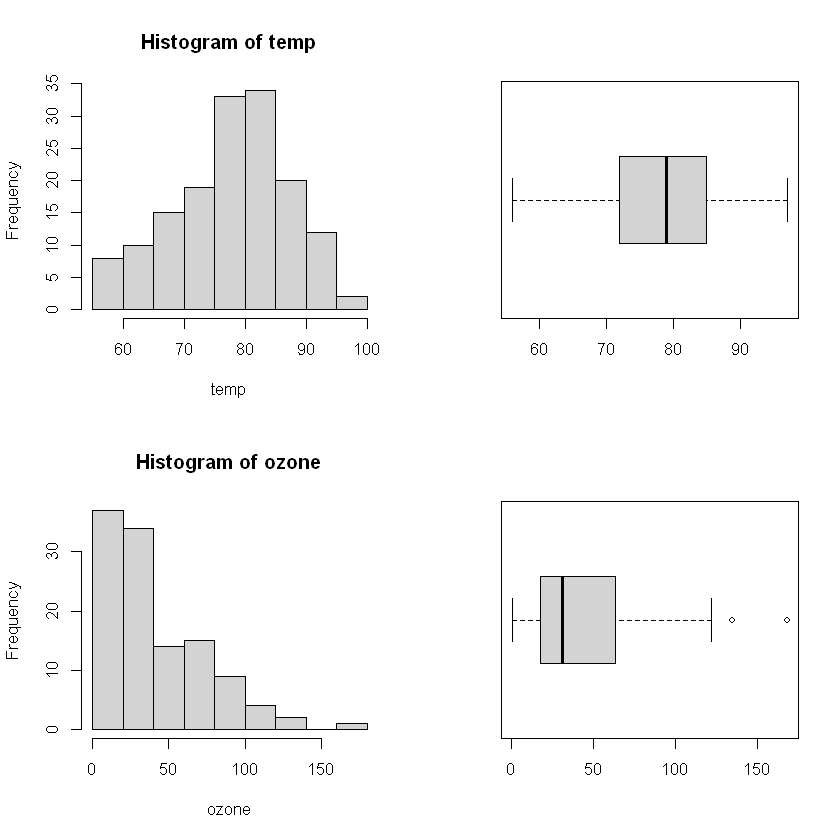

In [3]:
temp <- airquality$Temp
ozone <- airquality$Ozone
par(mfrow=c(2,2))
hist(temp)
boxplot(temp, horizontal=TRUE)
hist(ozone)
boxplot(ozone, horizontal=TRUE)

### More Precise Control
The graphical parameter fig lets us control the location of a figure precisely in a plot.

We need to provide the coordinates in a normalized form as c(x1, x2, y1, y2). For example, the whole plot area would be c(0, 1, 0, 1) with (x1, y1) = (0, 0) being the lower-left corner and (x2, y2) = (1, 1) being the upper-right corner.

_Note: we have used parameters cex to decrease the size of labels and mai to define margins._

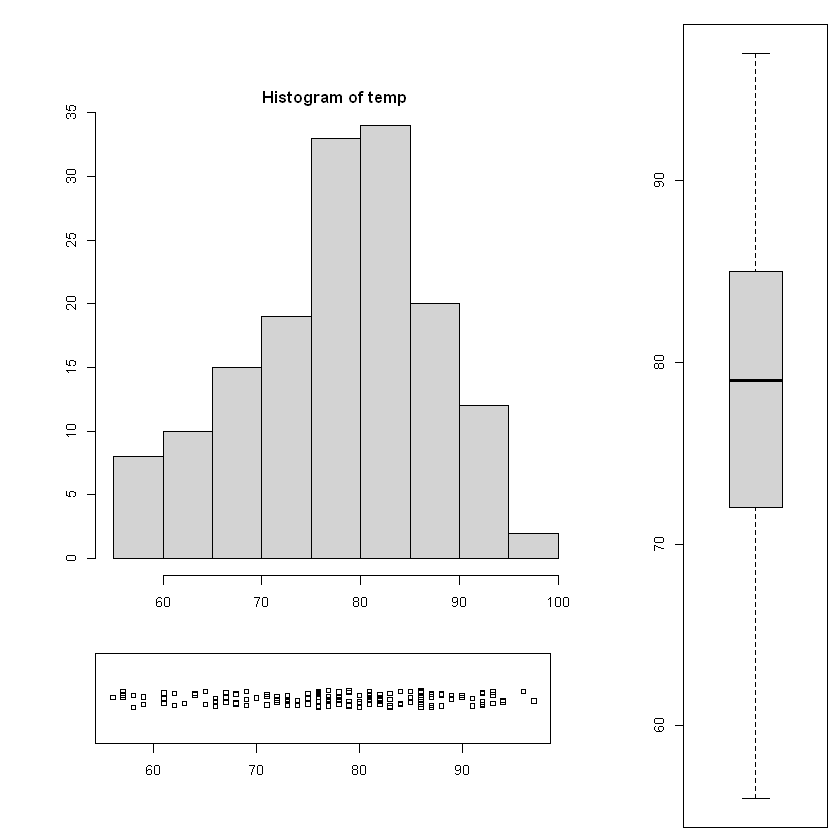

In [4]:
# make labels and margins smaller
par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))
# define area for the histogram
par(fig=c(0.1,0.7,0.3,0.9))
hist(temp)
# define area for the boxplot
par(fig=c(0.8,1,0,1), new=TRUE)
boxplot(temp)
# define area for the stripchart
par(fig=c(0.1,0.67,0.1,0.25), new=TRUE)
stripchart(temp, method="jitter")

<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Quiz](04.03-Quiz.ipynb) | [Contents](00.00-Index.ipynb) | [Evolutions: ggplot2, Plotly and Shiny](05.02-ggplot2.ipynb) > [Top](#top) ^ </span>

<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>This is the Jupyter notebook version of the __Python for Official Statistics__ produced by Eurostat; the content is available [on GitHub](https://github.com/eurostat/e-learning/tree/main/python-official-statistics).
<br>The text and code are released under the [EUPL-1.2 license](https://github.com/eurostat/e-learning/blob/main/LICENSE).</span>